In [8]:
### Plotting bettis

script_start_time = time()
println("\nimporting packages...")

using Pkg
using Statistics
using LinearAlgebra
using Eirene
using StatsBase
using CSV
using JLD
using DataFrames
using JSON
using MAT
using Plots

include("helper_functions.jl")
println("packages and functions imported")
printstyled("Elapsed time = $(time() - script_start_time) seconds \n \n", color = :yellow)


importing packages...


┌ Info: Recompiling stale cache file /opt/julia/compiled/v1.2/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1240


packages and functions imported
Elapsed time = 53.69991898536682 seconds 
 


In [2]:
### Set parameters

betti_colors = [["#243a4c"] ["#406372"] ["#66939e"] ["#9bc3c6"]]

# Read from config file
config_file = "config101220.json"
config = read_config("$(homedir())/configs/$(config_file)")

# Parameters for all graphs
const NNODES = config["NNODES"]
const MAXDIM = config["MAXDIM"]
const NREPS = config["NREPS"]
const DATE_STRING = config["DATE_STRING"]


### Locate data and find nametags
read_dir = "../processed_data/results/$(NNODES)nodes"
betti_files = filter(x->occursin("_bettis",x), readdir(read_dir))
betti_files = filter(x->occursin(DATE_STRING, x), betti_files)
betti_files = filter(x->!occursin("dsi", x), betti_files)

println("Located the following graph files:")
# for betti_file in betti_files
#     println(betti_file)
# end


# Locate the nametags
nametags = []
for betti_file in betti_files
    println(betti_file)
    tag = split(split(betti_file, "$(DATE_STRING)_")[2], "_bettis")[1]
    nametags = [nametags; tag]
end

nametags = unique(nametags)


for nametag in nametags
    namefiles = filter(x->occursin(nametag,x), betti_files)
    if length(namefiles)<12
    println(nametag)
    println(length(namefiles))
    end
end

nametags

Located the following graph files:
IID_70nodes_500reps_101220_forward_bettis.jld
IID_70nodes_500reps_101220_overlap_a01_b03_overlap_bettis.jld
IID_70nodes_500reps_101220_overlap_a02_b04_overlap_bettis.jld
IID_70nodes_500reps_101220_overlap_a03_b05_overlap_bettis.jld
IID_70nodes_500reps_101220_overlap_a04_b06_overlap_bettis.jld
IID_70nodes_500reps_101220_overlap_a05_b07_overlap_bettis.jld
IID_70nodes_500reps_101220_overlap_a06_b08_overlap_bettis.jld
IID_70nodes_500reps_101220_overlap_a07_b09_overlap_bettis.jld
IID_70nodes_500reps_101220_thresh015_edge363_noiseOnly_bettis.jld
IID_70nodes_500reps_101220_thresh015_edge363_randomized_threshold_bettis.jld
IID_70nodes_500reps_101220_thresh015_edge363_threshold_bettis.jld
IID_70nodes_500reps_101220_thresh01_edge242_noiseOnly_bettis.jld
IID_70nodes_500reps_101220_thresh01_edge242_randomized_threshold_bettis.jld
IID_70nodes_500reps_101220_thresh01_edge242_threshold_bettis.jld
IID_70nodes_500reps_101220_thresh025_edge604_noiseOnly_bettis.jld
IID_

clique10_70nodes_500reps_10_101220_thresh035_edge846_threshold_bettis.jld
clique10_70nodes_500reps_10_101220_thresh03_edge725_noiseOnly_bettis.jld
clique10_70nodes_500reps_10_101220_thresh03_edge725_randomized_threshold_bettis.jld
clique10_70nodes_500reps_10_101220_thresh03_edge725_threshold_bettis.jld
clique10_70nodes_500reps_10_101220_thresh045_edge1087_noiseOnly_bettis.jld
clique10_70nodes_500reps_10_101220_thresh045_edge1087_randomized_threshold_bettis.jld
clique10_70nodes_500reps_10_101220_thresh045_edge1087_threshold_bettis.jld
clique10_70nodes_500reps_10_101220_thresh04_edge966_noiseOnly_bettis.jld
clique10_70nodes_500reps_10_101220_thresh04_edge966_randomized_threshold_bettis.jld
clique10_70nodes_500reps_10_101220_thresh04_edge966_threshold_bettis.jld
clique10_70nodes_500reps_10_101220_thresh055_edge1329_noiseOnly_bettis.jld
clique10_70nodes_500reps_10_101220_thresh055_edge1329_randomized_threshold_bettis.jld
clique10_70nodes_500reps_10_101220_thresh055_edge1329_threshold_betti

clique25_70nodes_500reps_25_101220_thresh055_edge1329_randomized_threshold_bettis.jld
clique25_70nodes_500reps_25_101220_thresh055_edge1329_threshold_bettis.jld
clique25_70nodes_500reps_25_101220_thresh05_edge1208_noiseOnly_bettis.jld
clique25_70nodes_500reps_25_101220_thresh05_edge1208_randomized_threshold_bettis.jld
clique25_70nodes_500reps_25_101220_thresh05_edge1208_threshold_bettis.jld
clique25_70nodes_500reps_25_101220_thresh065_edge1570_noiseOnly_bettis.jld
clique25_70nodes_500reps_25_101220_thresh065_edge1570_randomized_threshold_bettis.jld
clique25_70nodes_500reps_25_101220_thresh065_edge1570_threshold_bettis.jld
clique25_70nodes_500reps_25_101220_thresh06_edge1449_noiseOnly_bettis.jld
clique25_70nodes_500reps_25_101220_thresh06_edge1449_randomized_threshold_bettis.jld
clique25_70nodes_500reps_25_101220_thresh06_edge1449_threshold_bettis.jld
clique25_70nodes_500reps_25_101220_thresh075_edge1812_noiseOnly_bettis.jld
clique25_70nodes_500reps_25_101220_thresh075_edge1812_randomiz

clique35_70nodes_500reps_35_101220_thresh025_edge604_randomized_threshold_bettis.jld
clique35_70nodes_500reps_35_101220_thresh025_edge604_threshold_bettis.jld
clique35_70nodes_500reps_35_101220_thresh02_edge483_noiseOnly_bettis.jld
clique35_70nodes_500reps_35_101220_thresh02_edge483_randomized_threshold_bettis.jld
clique35_70nodes_500reps_35_101220_thresh02_edge483_threshold_bettis.jld
clique35_70nodes_500reps_35_101220_thresh035_edge846_noiseOnly_bettis.jld
clique35_70nodes_500reps_35_101220_thresh035_edge846_randomized_threshold_bettis.jld
clique35_70nodes_500reps_35_101220_thresh035_edge846_threshold_bettis.jld
clique35_70nodes_500reps_35_101220_thresh03_edge725_noiseOnly_bettis.jld
clique35_70nodes_500reps_35_101220_thresh03_edge725_randomized_threshold_bettis.jld
clique35_70nodes_500reps_35_101220_thresh03_edge725_threshold_bettis.jld
clique35_70nodes_500reps_35_101220_thresh045_edge1087_noiseOnly_bettis.jld
clique35_70nodes_500reps_35_101220_thresh045_edge1087_randomized_threshol

clique_70nodes_500reps_101220_thresh07_edge1691_randomized_threshold_bettis.jld
clique_70nodes_500reps_101220_thresh07_edge1691_threshold_bettis.jld
clique_70nodes_500reps_101220_thresh085_edge2053_noiseOnly_bettis.jld
clique_70nodes_500reps_101220_thresh085_edge2053_randomized_threshold_bettis.jld
clique_70nodes_500reps_101220_thresh085_edge2053_threshold_bettis.jld
clique_70nodes_500reps_101220_thresh08_edge1932_noiseOnly_bettis.jld
clique_70nodes_500reps_101220_thresh08_edge1932_randomized_threshold_bettis.jld
clique_70nodes_500reps_101220_thresh08_edge1932_threshold_bettis.jld
clique_70nodes_500reps_101220_thresh09_edge2174_noiseOnly_bettis.jld
clique_70nodes_500reps_101220_thresh09_edge2174_randomized_threshold_bettis.jld
clique_70nodes_500reps_101220_thresh09_edge2174_threshold_bettis.jld
cliques10_70nodes_500reps_10_101220_forward_bettis.jld
cliques10_70nodes_500reps_10_101220_thresh015_edge363_noiseOnly_bettis.jld
cliques10_70nodes_500reps_10_101220_thresh015_edge363_randomized

cliques20_70nodes_500reps_20_101220_thresh03_edge725_randomized_threshold_bettis.jld
cliques20_70nodes_500reps_20_101220_thresh03_edge725_threshold_bettis.jld
cliques20_70nodes_500reps_20_101220_thresh045_edge1087_noiseOnly_bettis.jld
cliques20_70nodes_500reps_20_101220_thresh045_edge1087_randomized_threshold_bettis.jld
cliques20_70nodes_500reps_20_101220_thresh045_edge1087_threshold_bettis.jld
cliques20_70nodes_500reps_20_101220_thresh04_edge966_noiseOnly_bettis.jld
cliques20_70nodes_500reps_20_101220_thresh04_edge966_randomized_threshold_bettis.jld
cliques20_70nodes_500reps_20_101220_thresh04_edge966_threshold_bettis.jld
cliques20_70nodes_500reps_20_101220_thresh055_edge1329_noiseOnly_bettis.jld
cliques20_70nodes_500reps_20_101220_thresh055_edge1329_randomized_threshold_bettis.jld
cliques20_70nodes_500reps_20_101220_thresh055_edge1329_threshold_bettis.jld
cliques20_70nodes_500reps_20_101220_thresh05_edge1208_noiseOnly_bettis.jld
cliques20_70nodes_500reps_20_101220_thresh05_edge1208_r

cliques35_70nodes_500reps_35_101220_thresh085_edge2053_threshold_bettis.jld
cliques35_70nodes_500reps_35_101220_thresh08_edge1932_noiseOnly_bettis.jld
cliques35_70nodes_500reps_35_101220_thresh08_edge1932_randomized_threshold_bettis.jld
cliques35_70nodes_500reps_35_101220_thresh08_edge1932_threshold_bettis.jld
cliques35_70nodes_500reps_35_101220_thresh09_edge2174_noiseOnly_bettis.jld
cliques35_70nodes_500reps_35_101220_thresh09_edge2174_randomized_threshold_bettis.jld
cliques35_70nodes_500reps_35_101220_thresh09_edge2174_threshold_bettis.jld
cliques5_70nodes_500reps_5_101220_forward_bettis.jld
cliques5_70nodes_500reps_5_101220_thresh015_edge363_noiseOnly_bettis.jld
cliques5_70nodes_500reps_5_101220_thresh015_edge363_randomized_threshold_bettis.jld
cliques5_70nodes_500reps_5_101220_thresh015_edge363_threshold_bettis.jld
cliques5_70nodes_500reps_5_101220_thresh01_edge242_noiseOnly_bettis.jld
cliques5_70nodes_500reps_5_101220_thresh01_edge242_randomized_threshold_bettis.jld
cliques5_70nod

cosineGeometric_70nodes_500reps_3_101220_overlap_a07_b09_overlap_bettis.jld
cosineGeometric_70nodes_500reps_3_101220_thresh015_edge363_noiseOnly_bettis.jld
cosineGeometric_70nodes_500reps_3_101220_thresh015_edge363_randomized_threshold_bettis.jld
cosineGeometric_70nodes_500reps_3_101220_thresh015_edge363_threshold_bettis.jld
cosineGeometric_70nodes_500reps_3_101220_thresh01_edge242_noiseOnly_bettis.jld
cosineGeometric_70nodes_500reps_3_101220_thresh01_edge242_randomized_threshold_bettis.jld
cosineGeometric_70nodes_500reps_3_101220_thresh01_edge242_threshold_bettis.jld
cosineGeometric_70nodes_500reps_3_101220_thresh025_edge604_noiseOnly_bettis.jld
cosineGeometric_70nodes_500reps_3_101220_thresh025_edge604_randomized_threshold_bettis.jld
cosineGeometric_70nodes_500reps_3_101220_thresh025_edge604_threshold_bettis.jld
cosineGeometric_70nodes_500reps_3_101220_thresh02_edge483_noiseOnly_bettis.jld
cosineGeometric_70nodes_500reps_3_101220_thresh02_edge483_randomized_threshold_bettis.jld
cosin

discreteUniformConf_70nodes_500reps_0_1000_101220_thresh015_edge363_noiseOnly_bettis.jld
discreteUniformConf_70nodes_500reps_0_1000_101220_thresh015_edge363_randomized_threshold_bettis.jld
discreteUniformConf_70nodes_500reps_0_1000_101220_thresh015_edge363_threshold_bettis.jld
discreteUniformConf_70nodes_500reps_0_1000_101220_thresh01_edge242_noiseOnly_bettis.jld
discreteUniformConf_70nodes_500reps_0_1000_101220_thresh01_edge242_randomized_threshold_bettis.jld
discreteUniformConf_70nodes_500reps_0_1000_101220_thresh01_edge242_threshold_bettis.jld
discreteUniformConf_70nodes_500reps_0_1000_101220_thresh025_edge604_noiseOnly_bettis.jld
discreteUniformConf_70nodes_500reps_0_1000_101220_thresh025_edge604_randomized_threshold_bettis.jld
discreteUniformConf_70nodes_500reps_0_1000_101220_thresh025_edge604_threshold_bettis.jld
discreteUniformConf_70nodes_500reps_0_1000_101220_thresh02_edge483_noiseOnly_bettis.jld
discreteUniformConf_70nodes_500reps_0_1000_101220_thresh02_edge483_randomized_thr

geometricConf_70nodes_500reps_001_100_101220_thresh01_edge242_randomized_threshold_bettis.jld
geometricConf_70nodes_500reps_001_100_101220_thresh01_edge242_threshold_bettis.jld
geometricConf_70nodes_500reps_001_100_101220_thresh025_edge604_noiseOnly_bettis.jld
geometricConf_70nodes_500reps_001_100_101220_thresh025_edge604_randomized_threshold_bettis.jld
geometricConf_70nodes_500reps_001_100_101220_thresh025_edge604_threshold_bettis.jld
geometricConf_70nodes_500reps_001_100_101220_thresh02_edge483_noiseOnly_bettis.jld
geometricConf_70nodes_500reps_001_100_101220_thresh02_edge483_randomized_threshold_bettis.jld
geometricConf_70nodes_500reps_001_100_101220_thresh02_edge483_threshold_bettis.jld
geometricConf_70nodes_500reps_001_100_101220_thresh035_edge846_noiseOnly_bettis.jld
geometricConf_70nodes_500reps_001_100_101220_thresh035_edge846_randomized_threshold_bettis.jld
geometricConf_70nodes_500reps_001_100_101220_thresh035_edge846_threshold_bettis.jld
geometricConf_70nodes_500reps_001_100

ringLattice_70nodes_500reps_101220_thresh035_edge846_threshold_bettis.jld
ringLattice_70nodes_500reps_101220_thresh03_edge725_noiseOnly_bettis.jld
ringLattice_70nodes_500reps_101220_thresh03_edge725_randomized_threshold_bettis.jld
ringLattice_70nodes_500reps_101220_thresh03_edge725_threshold_bettis.jld
ringLattice_70nodes_500reps_101220_thresh045_edge1087_noiseOnly_bettis.jld
ringLattice_70nodes_500reps_101220_thresh045_edge1087_randomized_threshold_bettis.jld
ringLattice_70nodes_500reps_101220_thresh045_edge1087_threshold_bettis.jld
ringLattice_70nodes_500reps_101220_thresh04_edge966_noiseOnly_bettis.jld
ringLattice_70nodes_500reps_101220_thresh04_edge966_randomized_threshold_bettis.jld
ringLattice_70nodes_500reps_101220_thresh04_edge966_threshold_bettis.jld
ringLattice_70nodes_500reps_101220_thresh055_edge1329_noiseOnly_bettis.jld
ringLattice_70nodes_500reps_101220_thresh055_edge1329_randomized_threshold_bettis.jld
ringLattice_70nodes_500reps_101220_thresh055_edge1329_threshold_betti

sqdEuclidean_70nodes_500reps_3_101220_thresh065_edge1570_threshold_bettis.jld
sqdEuclidean_70nodes_500reps_3_101220_thresh06_edge1449_noiseOnly_bettis.jld
sqdEuclidean_70nodes_500reps_3_101220_thresh06_edge1449_randomized_threshold_bettis.jld
sqdEuclidean_70nodes_500reps_3_101220_thresh06_edge1449_threshold_bettis.jld
sqdEuclidean_70nodes_500reps_3_101220_thresh075_edge1812_noiseOnly_bettis.jld
sqdEuclidean_70nodes_500reps_3_101220_thresh075_edge1812_randomized_threshold_bettis.jld
sqdEuclidean_70nodes_500reps_3_101220_thresh075_edge1812_threshold_bettis.jld
sqdEuclidean_70nodes_500reps_3_101220_thresh07_edge1691_noiseOnly_bettis.jld
sqdEuclidean_70nodes_500reps_3_101220_thresh07_edge1691_randomized_threshold_bettis.jld
sqdEuclidean_70nodes_500reps_3_101220_thresh07_edge1691_threshold_bettis.jld
sqdEuclidean_70nodes_500reps_3_101220_thresh085_edge2053_noiseOnly_bettis.jld
sqdEuclidean_70nodes_500reps_3_101220_thresh085_edge2053_randomized_threshold_bettis.jld
sqdEuclidean_70nodes_500re

wprobTriangle2_70nodes_500reps_02_101220_thresh015_edge363_threshold_bettis.jld
wprobTriangle2_70nodes_500reps_02_101220_thresh01_edge242_noiseOnly_bettis.jld
wprobTriangle2_70nodes_500reps_02_101220_thresh01_edge242_randomized_threshold_bettis.jld
wprobTriangle2_70nodes_500reps_02_101220_thresh01_edge242_threshold_bettis.jld
wprobTriangle2_70nodes_500reps_02_101220_thresh025_edge604_noiseOnly_bettis.jld
wprobTriangle2_70nodes_500reps_02_101220_thresh025_edge604_randomized_threshold_bettis.jld
wprobTriangle2_70nodes_500reps_02_101220_thresh025_edge604_threshold_bettis.jld
wprobTriangle2_70nodes_500reps_02_101220_thresh02_edge483_noiseOnly_bettis.jld
wprobTriangle2_70nodes_500reps_02_101220_thresh02_edge483_randomized_threshold_bettis.jld
wprobTriangle2_70nodes_500reps_02_101220_thresh02_edge483_threshold_bettis.jld
wprobTriangle2_70nodes_500reps_02_101220_thresh035_edge846_noiseOnly_bettis.jld
wprobTriangle2_70nodes_500reps_02_101220_thresh035_edge846_randomized_threshold_bettis.jld
wp

wprobTriangle4_70nodes_500reps_04_101220_thresh04_edge966_noiseOnly_bettis.jld
wprobTriangle4_70nodes_500reps_04_101220_thresh04_edge966_randomized_threshold_bettis.jld
wprobTriangle4_70nodes_500reps_04_101220_thresh04_edge966_threshold_bettis.jld
wprobTriangle4_70nodes_500reps_04_101220_thresh055_edge1329_noiseOnly_bettis.jld
wprobTriangle4_70nodes_500reps_04_101220_thresh055_edge1329_randomized_threshold_bettis.jld
wprobTriangle4_70nodes_500reps_04_101220_thresh055_edge1329_threshold_bettis.jld
wprobTriangle4_70nodes_500reps_04_101220_thresh05_edge1208_noiseOnly_bettis.jld
wprobTriangle4_70nodes_500reps_04_101220_thresh05_edge1208_randomized_threshold_bettis.jld
wprobTriangle4_70nodes_500reps_04_101220_thresh05_edge1208_threshold_bettis.jld
wprobTriangle4_70nodes_500reps_04_101220_thresh065_edge1570_noiseOnly_bettis.jld
wprobTriangle4_70nodes_500reps_04_101220_thresh065_edge1570_randomized_threshold_bettis.jld
wprobTriangle4_70nodes_500reps_04_101220_thresh065_edge1570_threshold_bett

wprobTriangle6_70nodes_500reps_06_101220_thresh07_edge1691_randomized_threshold_bettis.jld
wprobTriangle6_70nodes_500reps_06_101220_thresh07_edge1691_threshold_bettis.jld
wprobTriangle6_70nodes_500reps_06_101220_thresh085_edge2053_noiseOnly_bettis.jld
wprobTriangle6_70nodes_500reps_06_101220_thresh085_edge2053_randomized_threshold_bettis.jld
wprobTriangle6_70nodes_500reps_06_101220_thresh085_edge2053_threshold_bettis.jld
wprobTriangle6_70nodes_500reps_06_101220_thresh08_edge1932_noiseOnly_bettis.jld
wprobTriangle6_70nodes_500reps_06_101220_thresh08_edge1932_randomized_threshold_bettis.jld
wprobTriangle6_70nodes_500reps_06_101220_thresh08_edge1932_threshold_bettis.jld
wprobTriangle6_70nodes_500reps_06_101220_thresh09_edge2174_noiseOnly_bettis.jld
wprobTriangle6_70nodes_500reps_06_101220_thresh09_edge2174_randomized_threshold_bettis.jld
wprobTriangle6_70nodes_500reps_06_101220_thresh09_edge2174_threshold_bettis.jld
wprobTriangle7_70nodes_500reps_07_101220_forward_bettis.jld
wprobTriangle

wprobTriangle95_70nodes_500reps_095_101220_thresh025_edge604_randomized_threshold_bettis.jld
wprobTriangle95_70nodes_500reps_095_101220_thresh025_edge604_threshold_bettis.jld
wprobTriangle95_70nodes_500reps_095_101220_thresh02_edge483_noiseOnly_bettis.jld
wprobTriangle95_70nodes_500reps_095_101220_thresh02_edge483_randomized_threshold_bettis.jld
wprobTriangle95_70nodes_500reps_095_101220_thresh02_edge483_threshold_bettis.jld
wprobTriangle95_70nodes_500reps_095_101220_thresh035_edge846_noiseOnly_bettis.jld
wprobTriangle95_70nodes_500reps_095_101220_thresh035_edge846_randomized_threshold_bettis.jld
wprobTriangle95_70nodes_500reps_095_101220_thresh035_edge846_threshold_bettis.jld
wprobTriangle95_70nodes_500reps_095_101220_thresh03_edge725_noiseOnly_bettis.jld
wprobTriangle95_70nodes_500reps_095_101220_thresh03_edge725_randomized_threshold_bettis.jld
wprobTriangle95_70nodes_500reps_095_101220_thresh03_edge725_threshold_bettis.jld
wprobTriangle95_70nodes_500reps_095_101220_thresh045_edge108

wprobTriangle_70nodes_500reps_1_101220_thresh055_edge1329_threshold_bettis.jld
wprobTriangle_70nodes_500reps_1_101220_thresh05_edge1208_noiseOnly_bettis.jld
wprobTriangle_70nodes_500reps_1_101220_thresh05_edge1208_randomized_threshold_bettis.jld
wprobTriangle_70nodes_500reps_1_101220_thresh05_edge1208_threshold_bettis.jld
wprobTriangle_70nodes_500reps_1_101220_thresh065_edge1570_noiseOnly_bettis.jld
wprobTriangle_70nodes_500reps_1_101220_thresh065_edge1570_randomized_threshold_bettis.jld
wprobTriangle_70nodes_500reps_1_101220_thresh065_edge1570_threshold_bettis.jld
wprobTriangle_70nodes_500reps_1_101220_thresh06_edge1449_noiseOnly_bettis.jld
wprobTriangle_70nodes_500reps_1_101220_thresh06_edge1449_randomized_threshold_bettis.jld
wprobTriangle_70nodes_500reps_1_101220_thresh06_edge1449_threshold_bettis.jld
wprobTriangle_70nodes_500reps_1_101220_thresh075_edge1812_noiseOnly_bettis.jld
wprobTriangle_70nodes_500reps_1_101220_thresh075_edge1812_randomized_threshold_bettis.jld
wprobTriangle_

59-element Array{Any,1}:
 "forward"                                
 "overlap_a01_b03_overlap"                
 "overlap_a02_b04_overlap"                
 "overlap_a03_b05_overlap"                
 "overlap_a04_b06_overlap"                
 "overlap_a05_b07_overlap"                
 "overlap_a06_b08_overlap"                
 "overlap_a07_b09_overlap"                
 "thresh015_edge363_noiseOnly"            
 "thresh015_edge363_randomized_threshold" 
 "thresh015_edge363_threshold"            
 "thresh01_edge242_noiseOnly"             
 "thresh01_edge242_randomized_threshold"  
 ⋮                                        
 "thresh07_edge1691_noiseOnly"            
 "thresh07_edge1691_randomized_threshold" 
 "thresh07_edge1691_threshold"            
 "thresh085_edge2053_noiseOnly"           
 "thresh085_edge2053_randomized_threshold"
 "thresh085_edge2053_threshold"           
 "thresh08_edge1932_noiseOnly"            
 "thresh08_edge1932_randomized_threshold" 
 "thresh08_edge1932_threshold

In [3]:
## Filter to include JUST the threshold ones
thresh_files = filter(x -> occursin("threshold",x),betti_files)
thresh_files = filter(x -> !occursin("randomized",x),thresh_files)
thresh_files = filter(x -> !occursin("clique",x),thresh_files)
thresh_files = filter(x -> !occursin("Triangle",x),thresh_files)
thresh_files = filter(x -> !occursin("noise",x),thresh_files)

204-element Array{String,1}:
 "IID_70nodes_500reps_101220_thresh015_edge363_threshold_bettis.jld"            
 "IID_70nodes_500reps_101220_thresh01_edge242_threshold_bettis.jld"             
 "IID_70nodes_500reps_101220_thresh025_edge604_threshold_bettis.jld"            
 "IID_70nodes_500reps_101220_thresh02_edge483_threshold_bettis.jld"             
 "IID_70nodes_500reps_101220_thresh035_edge846_threshold_bettis.jld"            
 "IID_70nodes_500reps_101220_thresh03_edge725_threshold_bettis.jld"             
 "IID_70nodes_500reps_101220_thresh045_edge1087_threshold_bettis.jld"           
 "IID_70nodes_500reps_101220_thresh04_edge966_threshold_bettis.jld"             
 "IID_70nodes_500reps_101220_thresh055_edge1329_threshold_bettis.jld"           
 "IID_70nodes_500reps_101220_thresh05_edge1208_threshold_bettis.jld"            
 "IID_70nodes_500reps_101220_thresh065_edge1570_threshold_bettis.jld"           
 "IID_70nodes_500reps_101220_thresh06_edge1449_threshold_bettis.jld"            

In [6]:
## Filter to only include every kth data point - for faster visualization loading

model_names = []
for thresh_file in thresh_files
    name = split(thresh_file, "_")[1]
    model_names = [model_names; name]
end

unique!(model_names)
betti_names = ["IID","assortative","coreperiphery", "cosineGeometric","disassortative", "discreteUniform","dotProduct", "geometricConf", "randomGeometric", "ringLattice", "rmsd", "squaredEuclidean" ];


In [7]:
model_names = ["IID","assortative","coreperiphery", "cosineGeometric","disassortative", "discreteUniform",
    "dotProduct", "geometricConf", "randomGeometric", "ringLattice", "rmsd", "squaredEuclidean" ]
mat_dir = "../processed_data/classification/"
mat_files = readdir(mat_dir)
mat_files = filter(x -> occursin(".mat",x), mat_files)
mat1 = matread("$(mat_dir)/$(mat_files[1])")
mat1["C"]

12×12 Array{Float64,2}:
 161.0    0.0    1.0    0.0   88.0    0.0  …    0.0   0.0    0.0   0.0   0.0
   0.0  250.0    0.0    0.0    0.0    0.0       0.0   0.0    0.0   0.0   0.0
   6.0    0.0  243.0    0.0    1.0    0.0       0.0   0.0    0.0   0.0   0.0
   0.0    0.0    0.0  149.0    0.0    0.0       0.0  28.0   39.0  17.0  17.0
 109.0    0.0    0.0    0.0  141.0    0.0       0.0   0.0    0.0   0.0   0.0
   0.0    0.0    0.0    1.0    0.0  211.0  …    6.0   1.0    0.0   0.0   0.0
   0.0    0.0    0.0    0.0    0.0   15.0     103.0   0.0    0.0   0.0   0.0
   0.0    0.0    0.0    0.0    0.0    0.0     151.0   0.0    0.0   0.0   0.0
   0.0    0.0    0.0   42.0    0.0    0.0       0.0  58.0   24.0  69.0  57.0
   0.0    0.0    0.0   27.0    0.0    0.0       0.0  13.0  180.0  23.0   7.0
   0.0    0.0    0.0   30.0    0.0    0.0  …    0.0  62.0   32.0  60.0  66.0
   0.0    0.0    0.0   36.0    0.0    0.0       0.0  65.0   39.0  65.0  45.0

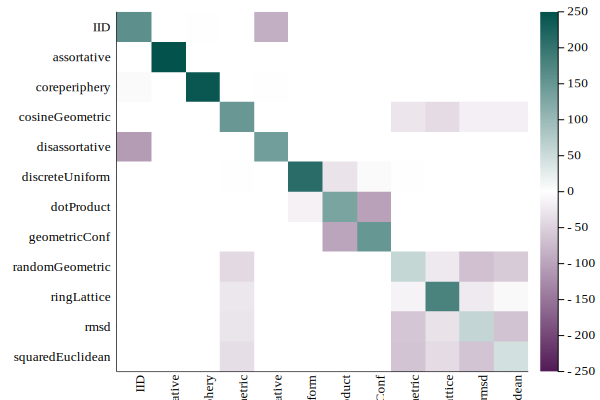

In [34]:
## Colors
correct = "#03524C"
incorrect = "#531B56"


# Loop through 

# multiply all the off diagonal entries by -1 so that the diverging colormap works appropriately

factor = (-1).*ones(size(mat1["C"])) .+ (2 .*Matrix(I,size(mat1["C"])))

heatmap(mat1["C"].*factor, c=cgrad([incorrect, :white, correct], [0,0.5, 1]),
    clim=(-250,250), yflip=true,
    xrotation=90,
    fontfamily=:Times,)
xticks!(collect(1:12), model_names)
yticks!(collect(1:12), model_names)

# savefig("test.pdf")

In [17]:
mat1["C"].*factor

12×12 Array{Float64,2}:
    0.0  -0.0  -1.0   -0.0  -88.0  …    -0.0   -0.0   -0.0   -0.0   -0.0
   -0.0   0.0  -0.0   -0.0   -0.0       -0.0   -0.0   -0.0   -0.0   -0.0
   -6.0  -0.0   0.0   -0.0   -1.0       -0.0   -0.0   -0.0   -0.0   -0.0
   -0.0  -0.0  -0.0    0.0   -0.0       -0.0  -28.0  -39.0  -17.0  -17.0
 -109.0  -0.0  -0.0   -0.0    0.0       -0.0   -0.0   -0.0   -0.0   -0.0
   -0.0  -0.0  -0.0   -1.0   -0.0  …    -6.0   -1.0   -0.0   -0.0   -0.0
   -0.0  -0.0  -0.0   -0.0   -0.0     -103.0   -0.0   -0.0   -0.0   -0.0
   -0.0  -0.0  -0.0   -0.0   -0.0        0.0   -0.0   -0.0   -0.0   -0.0
   -0.0  -0.0  -0.0  -42.0   -0.0       -0.0    0.0  -24.0  -69.0  -57.0
   -0.0  -0.0  -0.0  -27.0   -0.0       -0.0  -13.0    0.0  -23.0   -7.0
   -0.0  -0.0  -0.0  -30.0   -0.0  …    -0.0  -62.0  -32.0    0.0  -66.0
   -0.0  -0.0  -0.0  -36.0   -0.0       -0.0  -65.0  -39.0  -65.0    0.0